In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
from matplotlib import cm
from scipy import fft
from matplotlib.animation import FuncAnimation, PillowWriter 
from concurrent.futures import ThreadPoolExecutor
import pandas as pd
import time

2.0
3.141592653589793
3.141592653589793
Solved deterministic , (200, 300)


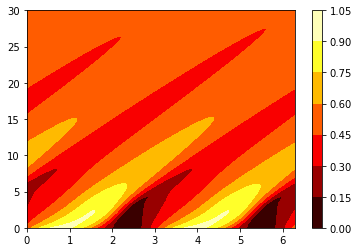

In [132]:
#definitions: 
alpha = 0.5; epsilon = .3; L = 2*np.pi; Ma = 0.5; vol = 1; I_0 = 1; remainder = Ma/I_0**2

def RHS_not_stoch(time,eta):
    N = len(eta)
    n = np.arange(N)
    n[int(N/2)+1:] -= N
    eta_z = fft.ifft(n*1j*np.pi*2/L*fft.fft(eta))
    eta_zzz = fft.ifft((n*1j*np.pi*2/L)**3*fft.fft(eta))
    detadt = -fft.ifft(n*1j*2*np.pi/L*fft.fft(eta**3*(1+(1-2*Ma)*eta_z+epsilon**2*eta_zzz))).real/3
    return detadt

T = 30
k = round(1/np.sqrt(2)/epsilon, 0)
print(k)
z = np.linspace(0, 2*np.pi, 200)
t = np.linspace(0,T, 300)
t_eval = np.linspace(0,T, 10)
delta_t = t[1]-t[0]

t_span = (0,T)
u0 = (1 + np.sin(z*k)*0.9)*(1-alpha)
print(np.trapz(u0, z))
print(L*(1-alpha))
result_ivp_determininistic = scipy.integrate.solve_ivp(RHS_not_stoch, t_span, u0, 'BDF', atol = 1e-9, t_eval =t)

u_det = result_ivp_determininistic.y
print('Solved deterministic ,', np.shape(u_det))
max_value_deterministic = np.max(u_det, axis=0)[-1]
Z,T = np.meshgrid(z,t)
plt.contourf(Z,T,u_det.T, cmap ='hot')
plt.colorbar()
plt.show()
np.save(f'full_data/det_data_feb28_alpha_{alpha}_epsilon_{epsilon}_Ma_{Ma}.npy', u_det)
np.save(f'full_data/times.npy', t_span)
np.save(f'full_data/collocation_points.npy', z)

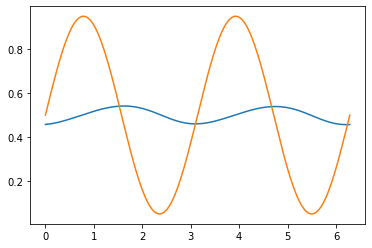

3.141592653589793

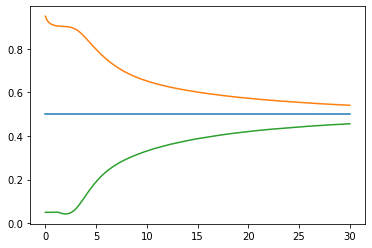

In [133]:
plt.plot(z, u_det[:,-1]), plt.plot(z, u0)
np.shape(u_det);plt.show()
plt.plot(t, np.mean(u_det, axis=0))
plt.plot(t, np.max(u_det, axis=0))
plt.plot(t, np.min(u_det, axis=0))
np.trapz(u0, z)

In [134]:
Number_of_iter = 1000
t_eval = np.linspace(0,T, 10)
max_values = np.zeros(Number_of_iter)
mean_current = np.zeros(Number_of_iter)
results_array = np.zeros((np.shape(u_det)[0], np.shape(u_det)[-1], Number_of_iter))
currents_array = np.zeros((len(t), Number_of_iter))
st = time.time(); stc = time.process_time()
for j in range(Number_of_iter):
    #generate the Brownian Motion for the current 
    I_t = np.cumsum(np.random.normal(loc=0.0, scale = vol*delta_t, size=(len(t), ))) + I_0
    currents_array[:,j] = I_t
    mean_current[j] = np.mean(I_t)
    def RHS_no_current(time,eta):
        I = np.interp(time, t,I_t)
        Ma = remainder*I**2
        N = len(eta)
        n = np.arange(N);
        n[int(N/2)+1:] -= N
        eta_z = fft.ifft(n*1j*np.pi*2/L*fft.fft(eta))
        eta_zzz = fft.ifft((n*1j*np.pi*2/L)**3*fft.fft(eta))
        detadt = -fft.ifft(n*1j*2*np.pi/L*fft.fft(eta**3*(1+(1-2*Ma)*eta_z+epsilon**2*eta_zzz))).real/3
        return detadt
    result_ivp = scipy.integrate.solve_ivp(RHS_no_current, t_span, u0, 'BDF', atol = 1e-3, t_eval = t)
    max_values[j] = np.max(result_ivp.y, axis = 0)[-1]
    results_array[:,:, j] = result_ivp.y
    
    if (j+1) % 10 == 0:
        print('Solved stoch,', np.shape(result_ivp.y), int(100*(j+1)/Number_of_iter), ' %', {time.time()-et}, ' seconds')
    del I_t
    del RHS_no_current
    del result_ivp
etc = time.process_time()

# get execution time
res = etc - stc
print(f'CPU time = {res}. Per iteration = {round(res/Number_of_iter, 3)}')
et = time.time()

# get the execution time
elapsed_time = et - st

print(f'Wall time = {elapsed_time}. Per iteration = {round(elapsed_time/Number_of_iter, 3)}')
np.save(f'full_data/data_feb28_vol_{vol}_alpha_{alpha}_epsilon_{epsilon}_Ma_{Ma}_N_iter_{Number_of_iter}.npy', results_array)
np.save(f'full_data/currents_feb28_vol_{vol}_alpha_{alpha}_epsilon_{epsilon}_Ma_{Ma}_N_iter_{Number_of_iter}.npy', currents_array)


Solved stoch, (200, 300) 1  %
Solved stoch, (200, 300) 2  %
Solved stoch, (200, 300) 3  %
Solved stoch, (200, 300) 4  %
Solved stoch, (200, 300) 5  %
Solved stoch, (200, 300) 6  %
Solved stoch, (200, 300) 7  %
Solved stoch, (200, 300) 8  %
Solved stoch, (200, 300) 9  %
Solved stoch, (200, 300) 10  %
Solved stoch, (200, 300) 11  %
Solved stoch, (200, 300) 12  %
Solved stoch, (200, 300) 13  %
Solved stoch, (200, 300) 14  %
Solved stoch, (200, 300) 15  %
Solved stoch, (200, 300) 16  %
Solved stoch, (200, 300) 17  %
Solved stoch, (200, 300) 18  %
Solved stoch, (200, 300) 19  %
Solved stoch, (200, 300) 20  %
Solved stoch, (200, 300) 21  %
Solved stoch, (200, 300) 22  %
Solved stoch, (200, 300) 23  %
Solved stoch, (200, 300) 24  %
Solved stoch, (200, 300) 25  %
Solved stoch, (200, 300) 26  %
Solved stoch, (200, 300) 27  %
Solved stoch, (200, 300) 28  %
Solved stoch, (200, 300) 29  %
Solved stoch, (200, 300) 30  %
Solved stoch, (200, 300) 31  %
Solved stoch, (200, 300) 32  %
Solved stoch, (20

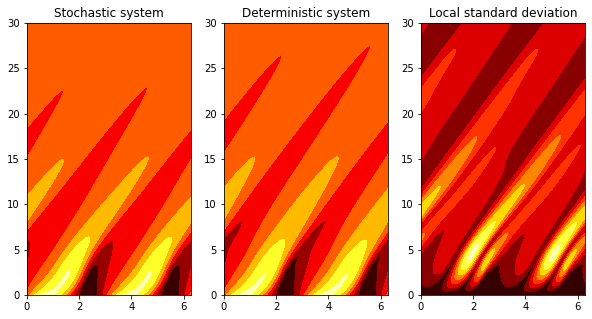

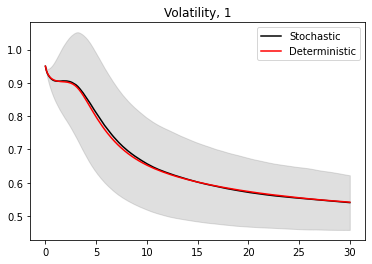

In [135]:
mean_result = np.mean(results_array, axis=-1)
std_result = np.std(results_array, axis=-1)
fig, ax=plt.subplots(nrows=1, ncols = 3, figsize = (10,5))
Z,T = np.meshgrid(z,t)
ax[0].contourf(Z,T,mean_result.T, cmap ='hot')
ax[0].set_title('Stochastic system')
ax[1].contourf(Z,T,u_det.T, cmap ='hot')
ax[1].set_title('Deterministic system')
ax[2].contourf(Z,T,std_result.T, cmap ='hot')
ax[2].set_title('Local standard deviation')
plt.savefig('stoch_averaging.jpg')
#plt.colorbar()
plt.show()

plt.plot(t, np.max(mean_result, axis=0), color ='black', label ='Stochastic')
plt.fill_between(t, np.max(mean_result, axis=0)+np.std(np.max(results_array, axis=0), axis=-1), 
         np.max(mean_result, axis=0)-np.std(np.max(results_array, axis=0), axis=-1), color ='grey', alpha = 0.25)
plt.title(f'Volatility, {vol}')
plt.plot(t, np.max(u_det, axis=0), color='red', label='Deterministic')
plt.legend()

#plt.plot(t,np.mean(currents_array, -1))

In [120]:
np.save(f'full_data/data_feb28_vol_{vol}_alpha_{alpha}_epsilon_{epsilon}_Ma_{Ma}.npy', results_array)
#data = np.load(f'data_feb27_vol_{vol}_alpha_{alpha}_epsilon_{epsilon}_Ma_{Ma}_T_{T}.npy')

In [137]:
data = np.load(f'full_data/data_feb28_vol_0.1_alpha_0.5_epsilon_0.3_Ma_0.5_N_iter_3000.npy')

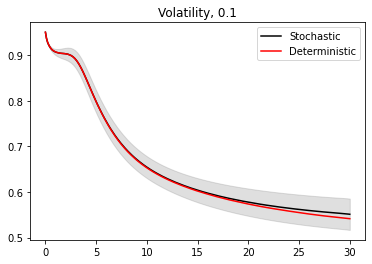

In [141]:
mean_result = np.mean(data, axis=-1)
plt.plot(t, np.max(mean_result, axis=0), color ='black', label ='Stochastic')
plt.fill_between(t, np.max(mean_result, axis=0)+np.std(np.max(data, axis=0), axis=-1), 
         np.max(mean_result, axis=0)-np.std(np.max(data, axis=0), axis=-1), color ='grey', alpha = 0.25)
plt.title(f'Volatility, {0.1}')
plt.plot(t, np.max(u_det, axis=0), color='red', label='Deterministic')
plt.legend()

The linearized PDE will have constant coefficients can be solved (analytically). 